In [1]:
import pydot

In [2]:
import numpy as np
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf
tf.python.control_flow_ops = tf

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

Using TensorFlow backend.


In [3]:
def VGG16():
    # Set proper input shape
    input_shape = (224, 224, 3)
    img_input = Input(shape=input_shape)
    
    # Block 1
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv1')(x)
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv2')(x)
    x = Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv1')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv2')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv1')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv2')(x)
    x = Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    x = Flatten(name='flatten')(x)
    
    # Classification block
    x = Dense(160, activation='relu', name='fc1')(x)
    x = Dropout(0.2)(x)
    x = Dense(160, activation='relu', name='fc2')(x)
    x = Dropout(0.2)(x)
    x = Dense(20, activation='softmax', name='predictions')(x)   
        
    # Create model
    model = Model(img_input, x)

    return model

In [4]:
model = VGG16()

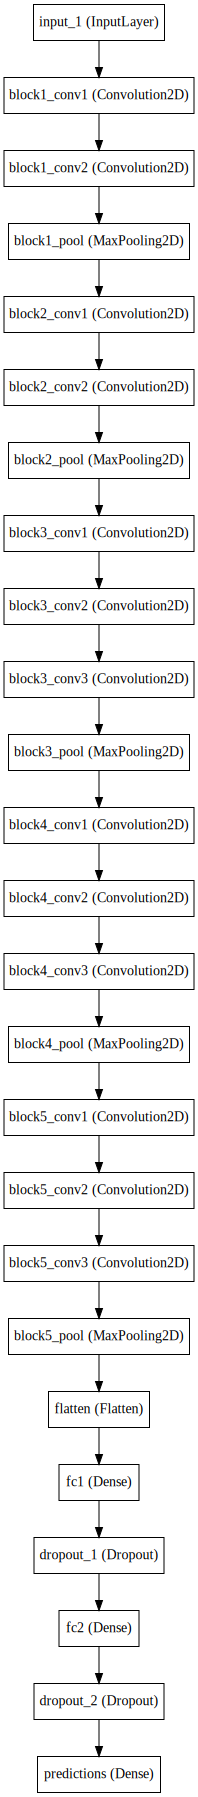

In [7]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
from keras.utils.visualize_util import plot
from IPython.display import Image

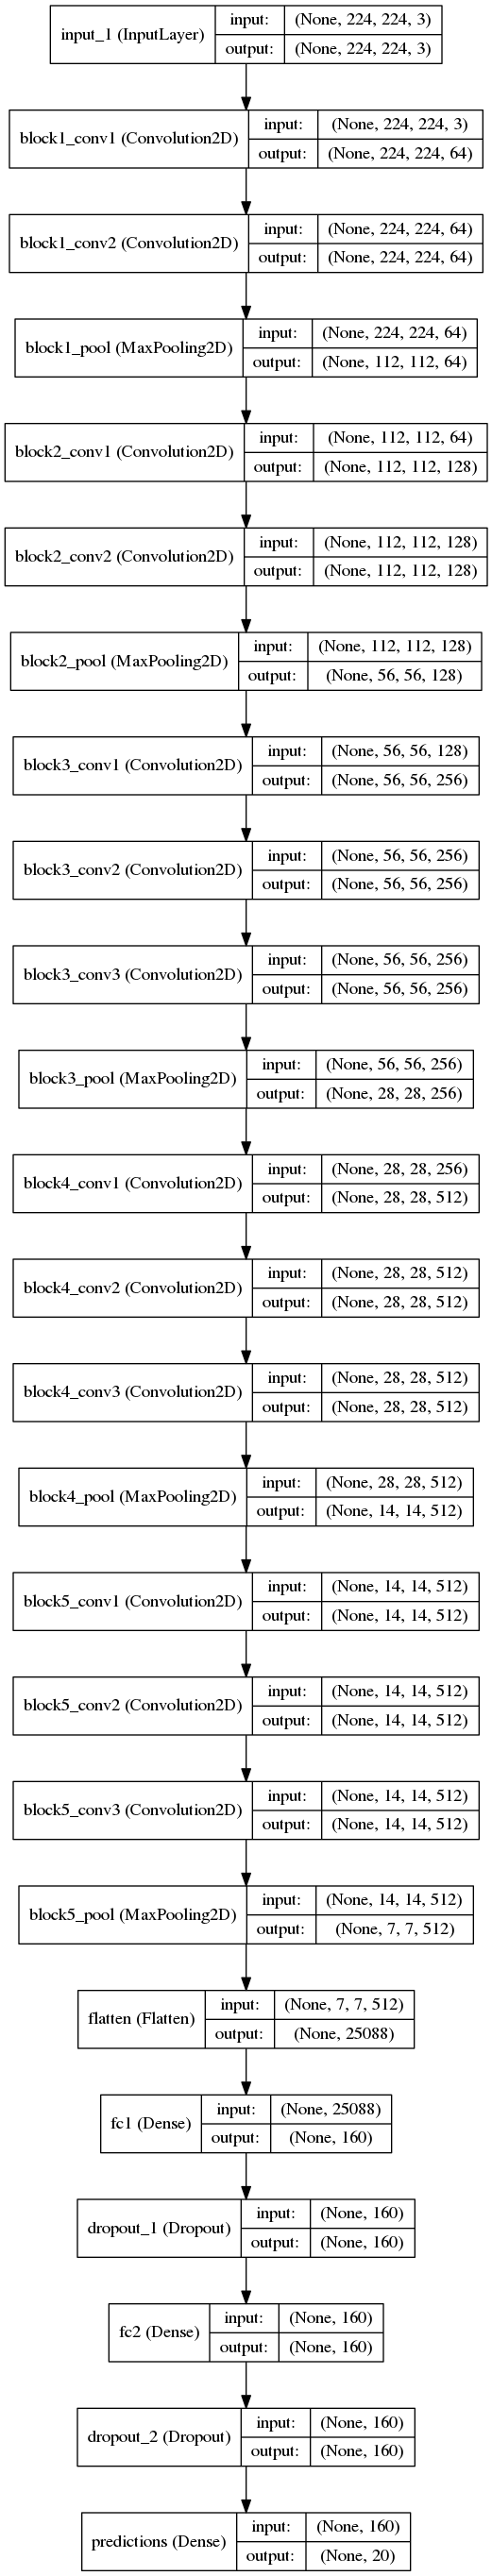

In [12]:
# Save to file
plot(model, to_file='vgg16model.png', show_shapes=True)
Image(filename='vgg16model.png')